In [1]:
library(ggplot2)
library(reshape2)

In [2]:
df = read.table("../../../bsa_by_rnaseq/05_mapping/allele_freq_ratio_winsize_16000000.txt", sep = '\t', header = TRUE)

In [3]:
head(df)

chromosome,start,end,window,H14_ref_depth,H14_alt_depth,M14_ref_depth,M14_alt_depth,H19_ref_depth,H19_alt_depth,...,M14_ref_freq,M14_alt_freq,her14_ref_ratio,her14_alt_ratio,H19_ref_freq,H19_alt_freq,M19_ref_freq,M19_alt_freq,her19_ref_ratio,her19_alt_ratio
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Chr01,0,15999999,1,791,1036,1323,1201,407,534,...,0.5241489,0.4758511,0.8261461,0.8392784,0.4326617,0.5673383,0.5273141,0.4726859,0.8205009,0.8331641
Chr01,16000000,31999999,2,401,533,608,904,184,332,...,0.4022457,0.5977543,1.0677235,1.0477491,0.3571429,0.6428571,0.4114078,0.5885922,0.8680995,0.9155879
Chr01,32000000,47999999,3,1685,2033,1956,2395,904,1270,...,0.4495750,0.5504250,1.0081206,1.0066770,0.4159007,0.5840993,0.4831461,0.5168539,0.8608178,0.8848735
Chr01,48000000,63999999,4,926,1020,1475,1505,479,709,...,0.4949698,0.5050302,0.9614176,0.9635639,0.4033613,0.5966387,0.4842569,0.5157431,0.8329490,0.8644144
Chr01,64000000,79999999,5,2123,2409,2215,2492,968,1336,...,0.4705882,0.5294118,0.9954786,0.9959971,0.4202082,0.5797918,0.4418070,0.5581930,0.9511124,0.9627472
Chr01,80000000,95999999,6,1124,1312,1082,1775,630,814,...,0.3788038,0.6211962,1.2181605,1.1534474,0.4363762,0.5636238,0.4644295,0.5355705,0.9395962,0.9502269


In [4]:
meltdf = melt(df, id.vars = c("window", "chromosome", "start", "end"))

In [5]:
ratiodf = subset(meltdf, variable == 'her14_alt_ratio' | variable == 'her19_alt_ratio')

In [1]:
# Plot her14 ratio
gg = ggplot(ratiodf, aes(x=window, y=value, color=chromosome))
gg = gg + geom_point(size = 0.5)
gg = gg + scale_color_manual(values = c("#000000", rep_len(c("#BBBBBB", "#000000"), length(unique(df$chromosome))-1)))
gg = gg + theme_classic()
gg = gg + theme(legend.position = "none")
gg = gg + facet_grid(variable ~ ., scales = "free")
gg
ggsave('association_genome.pdf', device = "pdf", width = 5.75, height = 1.5, units = "in")

ERROR: Error in ggplot(ratiodf, aes(x = window, y = value, color = chromosome)): could not find function "ggplot"


In [7]:
freqdf = subset(subset(meltdf, variable == 'H19_alt_freq' | variable == 'M19_alt_freq'), chromosome == 'Chr29' | chromosome == 'Chr28' | chromosome == 'Chr30' | chromosome == 'Chr27' | chromosome == 'Chr31' | chromosome == 'Chr32' | chromosome == 'Chr26' | chromosome == 'Chr33' )

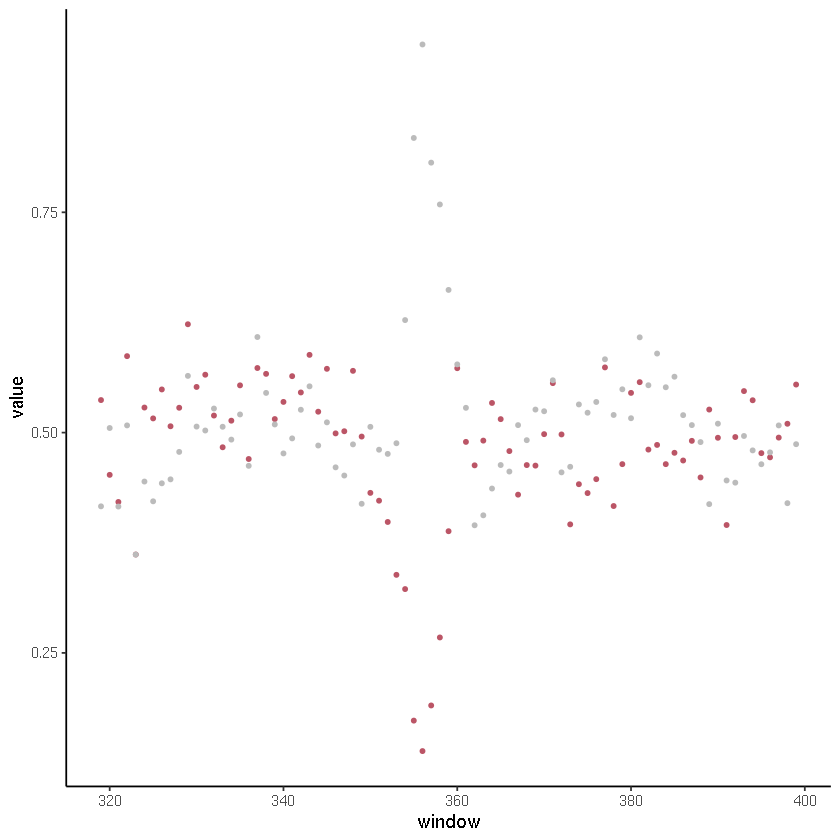

In [8]:
# Plot example frequencies
gg = ggplot(freqdf, aes(x=window, y=value, color=variable))
gg = gg + geom_point(size = 1)
gg = gg + scale_color_manual(values = c("#BB5566", "#BBBBBB"))
gg = gg + theme_classic()
gg = gg + theme(legend.position = "none")
gg
ggsave('frequencies_example.pdf', device = "pdf", width = 4, height = 2, units = "in")

In [9]:
exdf = subset(subset(meltdf, variable == 'her19_alt_ratio'), chromosome == 'Chr29' | chromosome == 'Chr28' | chromosome == 'Chr30' | chromosome == 'Chr27' | chromosome == 'Chr31' | chromosome == 'Chr32' | chromosome == 'Chr26' | chromosome == 'Chr33' )

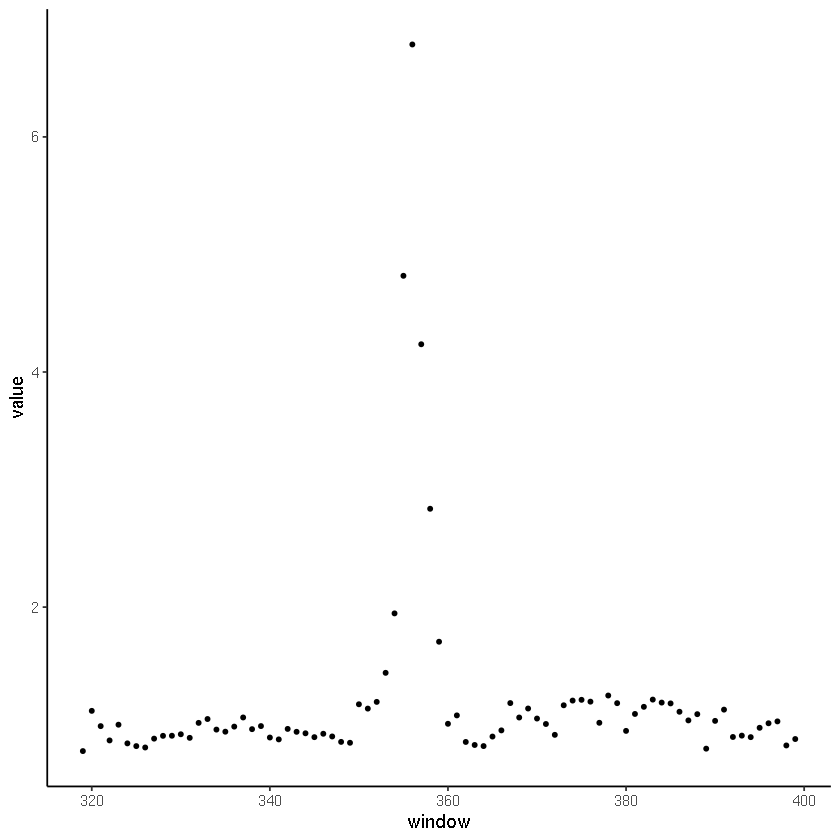

In [10]:
# Plot example ratio
gg = ggplot(exdf, aes(x=window, y=value))
gg = gg + geom_point(size = 1, color='black')
gg = gg + theme_classic()
gg = gg + theme(legend.position = "none")
gg
ggsave('ratio_example.pdf', device = "pdf", width = 4, height = 2, units = "in")

In [11]:
df = read.table("../../../bsa_by_rnaseq/05_mapping/allele_freq_ratio_winsize_16000000.txt", sep = '\t', header = TRUE)

In [12]:
meltdf = melt(df, id.vars = c("window", "chromosome", "start", "end"))

In [13]:
chrdf = subset(subset(meltdf, variable == 'her19_ref_ratio' | variable == 'her14_ref_ratio' | variable == 'her19_alt_ratio' | variable == 'her14_alt_ratio'), chromosome == 'Chr29')

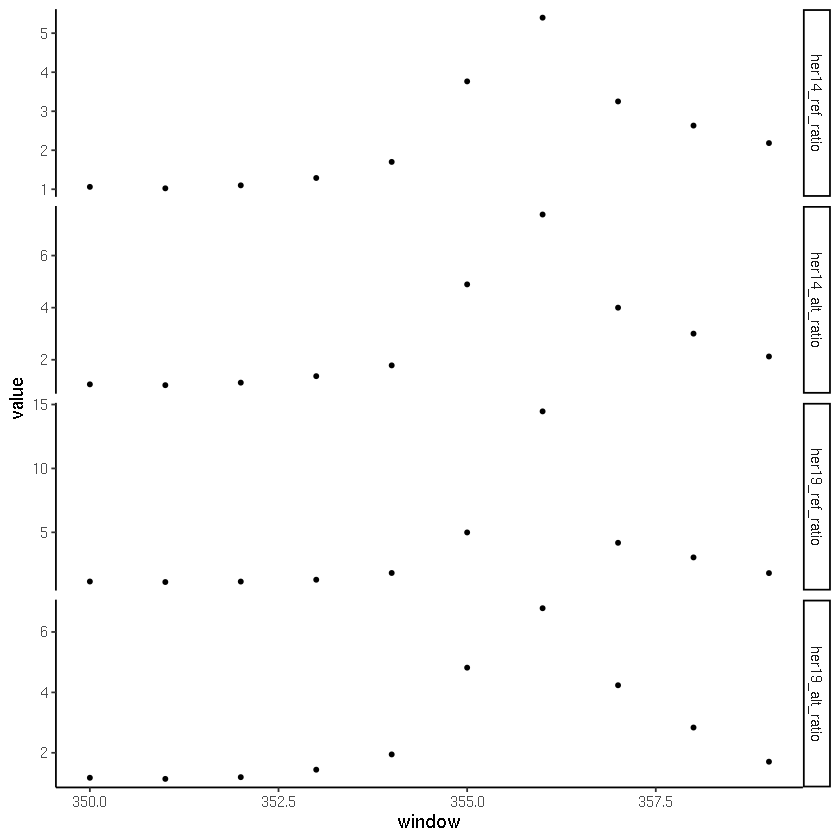

In [19]:
# Plot her14 ratio
gg = ggplot(chrdf, aes(x=window, y=value, color=chromosome))
gg = gg + geom_point(size = 1, color = 'black')
gg = gg + theme_classic()
gg = gg + theme(legend.position = "none")
gg = gg + facet_grid(variable ~ ., scales = "free")
gg
ggsave('association_chr29.pdf', device = "pdf", width = 3, height = 5, units = "in")